<a href="https://colab.research.google.com/github/dongminkim0220/pytorch_tutorial/blob/master/forward_and_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed Forward and Convnet

# PyTorch Tutorial 13 - Feed-Forward Neural Network
https://www.youtube.com/watch?v=oPhxf2fXHkQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=13

# PyTorch Tutorial 14 - Convolutional Neural Network (CNN)
https://www.youtube.com/watch?v=pDdP0TFzsoQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=14

## Feed Forward

In [36]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

hyperparameter

In [4]:
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

MNIST

In [5]:
train_dataset = torchvision.datasets.MNIST(root = "./data", train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = "./data", train = False, transform = transforms.ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [7]:
examples = iter(train_loader)

In [8]:
samples, labels = examples.next()

In [9]:
samples, labels

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

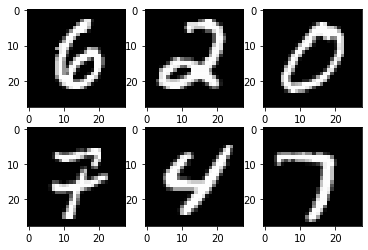

In [10]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap = "gray")
plt.show()

Network

In [11]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [12]:
model = NeuralNet(input_size, hidden_size, num_classes)
model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

loss and optimizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

training loop

In [14]:
n_total_steps = len(train_loader)

In [15]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    output = model(images)
    loss = criterion(output, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 is 0:
      print(f"epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

epoch 1 / 2, step 100/600, loss = 0.4475
epoch 1 / 2, step 200/600, loss = 0.1682
epoch 1 / 2, step 300/600, loss = 0.4253
epoch 1 / 2, step 400/600, loss = 0.2653
epoch 1 / 2, step 500/600, loss = 0.2095
epoch 1 / 2, step 600/600, loss = 0.3128
epoch 2 / 2, step 100/600, loss = 0.3039
epoch 2 / 2, step 200/600, loss = 0.2519
epoch 2 / 2, step 300/600, loss = 0.1394
epoch 2 / 2, step 400/600, loss = 0.1145
epoch 2 / 2, step 500/600, loss = 0.1192
epoch 2 / 2, step 600/600, loss = 0.1820


test

In [16]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1, 28* 28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct = (predictions == labels).sum().item()

acc = 100.0 * n_correct / n_samples

In [17]:
acc

0.93

## cnn

In [18]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [19]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [20]:
train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [64]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [65]:
examples = iter(train_loader)
samples, labels = examples.next()
samples, labels

(tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           ...,
           [-0.0196, -0.0275, -0.0275,  ...,  0.1137, -0.0588, -0.0196],
           [-0.0196, -0.0353, -0.0353,  ...,  0.1529, -0.0667, -0.0510],
           [-0.0196, -0.0588, -0.0824,  ...,  0.1843,  0.0431, -0.0431]],
 
          [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           ...,
           [ 0.0353,  0.0353,  0.0353,  ...,  0.1216, -0.0431,  0.0196],
           [ 0.0431,  0.0275,  0.0353,  ...,  0.1529, -0.0588, -0.0118],
           [ 0.0431,  0.0118, -0.0039,  ...,  0.1765,  0.0431, -0.0196]],
 
          [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 

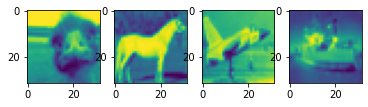

In [66]:
for i in range(4):
  plt.subplot(2, 4, i+1)
  plt.imshow(samples[i][0])
plt.show()

In [67]:
samples.shape

torch.Size([4, 3, 32, 32])

In [68]:
labels.shape

torch.Size([4])

In [69]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [74]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels= 6, kernel_size = 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # conv - relu - pool
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool(x)

    # conv - relu - pool
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    # fc
    x = x.view(-1, 16 * 5 * 5)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    return x

In [75]:
model = ConvNet().to(device)

In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
n_total_steps = len(train_loader)

training

In [77]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # forward    
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 is 0:
      print(f"Epoch [{epoch+1}/{num_epochs}] | Step [{i+1} / {n_total_steps}] | Loss: {loss.item():.4f}")

Epoch [1/4] | Step [2000 / 12500] | Loss: 2.2883
Epoch [1/4] | Step [4000 / 12500] | Loss: 2.3134
Epoch [1/4] | Step [6000 / 12500] | Loss: 2.3170
Epoch [1/4] | Step [8000 / 12500] | Loss: 2.2897
Epoch [1/4] | Step [10000 / 12500] | Loss: 2.2881
Epoch [1/4] | Step [12000 / 12500] | Loss: 2.2669
Epoch [2/4] | Step [2000 / 12500] | Loss: 2.1803
Epoch [2/4] | Step [4000 / 12500] | Loss: 1.6816
Epoch [2/4] | Step [6000 / 12500] | Loss: 2.1158
Epoch [2/4] | Step [8000 / 12500] | Loss: 1.4771
Epoch [2/4] | Step [10000 / 12500] | Loss: 2.4708
Epoch [2/4] | Step [12000 / 12500] | Loss: 1.8569
Epoch [3/4] | Step [2000 / 12500] | Loss: 1.2889
Epoch [3/4] | Step [4000 / 12500] | Loss: 2.0463
Epoch [3/4] | Step [6000 / 12500] | Loss: 1.8158
Epoch [3/4] | Step [8000 / 12500] | Loss: 1.7030
Epoch [3/4] | Step [10000 / 12500] | Loss: 1.7301
Epoch [3/4] | Step [12000 / 12500] | Loss: 0.9541
Epoch [4/4] | Step [2000 / 12500] | Loss: 0.9541
Epoch [4/4] | Step [4000 / 12500] | Loss: 1.7064
Epoch [4/4] | 

testing

In [79]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

In [80]:
acc = 100.0 * n_correct / n_samples
acc

47.03

In [82]:
for i in range(10):
  acci = 100.0 * n_class_correct[i] / n_class_samples[i]
  print(f"acc of {classes[i]}: {acci} ")

acc of plane: 47.7 
acc of car: 65.2 
acc of bird: 30.9 
acc of cat: 30.3 
acc of deer: 33.0 
acc of dog: 46.5 
acc of frog: 62.9 
acc of horse: 45.5 
acc of ship: 58.3 
acc of truck: 50.0 
